In [2]:
#1. Importar todas las librerías necesarias
#2. Inicializar algunas variables que después modificaremos (0.15 puntos)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

number_of_hosts = 0
OS = '0'

In [4]:
#3. Crear una función para generar los hostnames en base a unas reglas

In [5]:
hostnames = []

In [6]:
def set_hostnames(number_of_hosts: int) -> None:
    alpha_3_country_codes =  ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30 
    os_prefix = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1 #40% linux, 30% Solaris, 20% AIX, 10% HP-UX
    enviroments = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    grupo_alpha = []
    
    for i in range(number_of_hosts):
        country = random.choice(alpha_3_country_codes)
        hostname = random.choice(os_prefix) + random.choice(enviroments)
        hostname += country
        grupo_alpha.append(hostname)
        hostname += str(grupo_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)

In [7]:
#4. Crear una función para obtener el nombre del OS

In [8]:
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknown'

In [9]:
get_os('HTIRL001')


'HP-UX'

In [10]:
#5. Crear una función para obtener el nombre del entorno

In [11]:
def get_enviroment(hostname: str) -> str:
    os_dict = {
        'D': 'Development',
        'I': 'Integration',
        'T': 'Testing',
        'S': 'Staging',
        'P': 'Production'
    }
    
    os_key = hostname[1]
    
    return os_dict.get(os_key, 'Unknown')

In [12]:
#6. Creamos una función para obtener el nombre del país

In [13]:
def get_country(hostname: str) -> str:
    os_dict = {
        'NOR': 'Norway',
        'IRL': 'Ireland',
        'DEU': 'Germany',
        'ITA': 'Italy',
        'ESP': 'Spain',
        'FRA': 'France',
    }
    
    os_key = hostname[2:5]
    
    return os_dict.get(os_key, 'Unknown')

In [14]:
#7. Crear una función para generar el DataFrame

In [15]:
dataset = []

In [16]:
def set_dataframe (count: int) -> None:
    global df
    set_hostnames(count)
    for hostname in hostnames:
        hostname_dict = {
            'hostname':hostname, 
            'os': get_os(hostname),
            'enviroment': get_enviroment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-3:]) #De tipo int, por ejemplo 3.
        }
        dataset.append(hostname_dict)
    df = pd.DataFrame(dataset)
    
    

In [17]:
#8. Crear el DataFrame (0.2 puntos)

In [18]:
set_dataframe(1500)

print(df)

      hostname       os   enviroment  country  node
0     HPESP001    HP-UX   Production    Spain     1
1     SSIRL001  Solaris      Staging  Ireland     1
2     STESP001  Solaris      Testing    Spain     1
3     LSIRL001    Linux      Staging  Ireland     1
4     HDIRL001    HP-UX  Development  Ireland     1
...        ...      ...          ...      ...   ...
1495  LTIRL045    Linux      Testing  Ireland    45
1496  LPDEU035    Linux   Production  Germany    35
1497  STIRL048  Solaris      Testing  Ireland    48
1498  HSNOR002    HP-UX      Staging   Norway     2
1499  LPNOR014    Linux   Production   Norway    14

[1500 rows x 5 columns]


In [19]:
#9. Guardar el DataFrame generado en un fichero CSV

In [20]:
df.to_csv('hosts.csv', index=False, header=True,)

df = pd.read_csv('hosts.csv', delimiter = ',')

hosts_df = df

print(hosts_df)

      hostname       os   enviroment  country  node
0     HPESP001    HP-UX   Production    Spain     1
1     SSIRL001  Solaris      Staging  Ireland     1
2     STESP001  Solaris      Testing    Spain     1
3     LSIRL001    Linux      Staging  Ireland     1
4     HDIRL001    HP-UX  Development  Ireland     1
...        ...      ...          ...      ...   ...
1495  LTIRL045    Linux      Testing  Ireland    45
1496  LPDEU035    Linux   Production  Germany    35
1497  STIRL048  Solaris      Testing  Ireland    48
1498  HSNOR002    HP-UX      Staging   Norway     2
1499  LPNOR014    Linux   Production   Norway    14

[1500 rows x 5 columns]


In [21]:
#10.Generar un único gráfico agrupando para cada país (country) los entornos (enviroment)

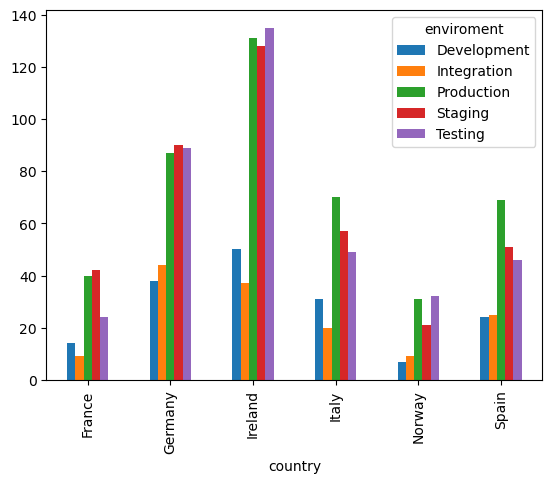

In [22]:
c = df
cg = df.groupby(['country', 'enviroment']).size()
cg_envi = cg.unstack().plot(kind='bar')


In [23]:
#11.Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas (4.5 puntos)

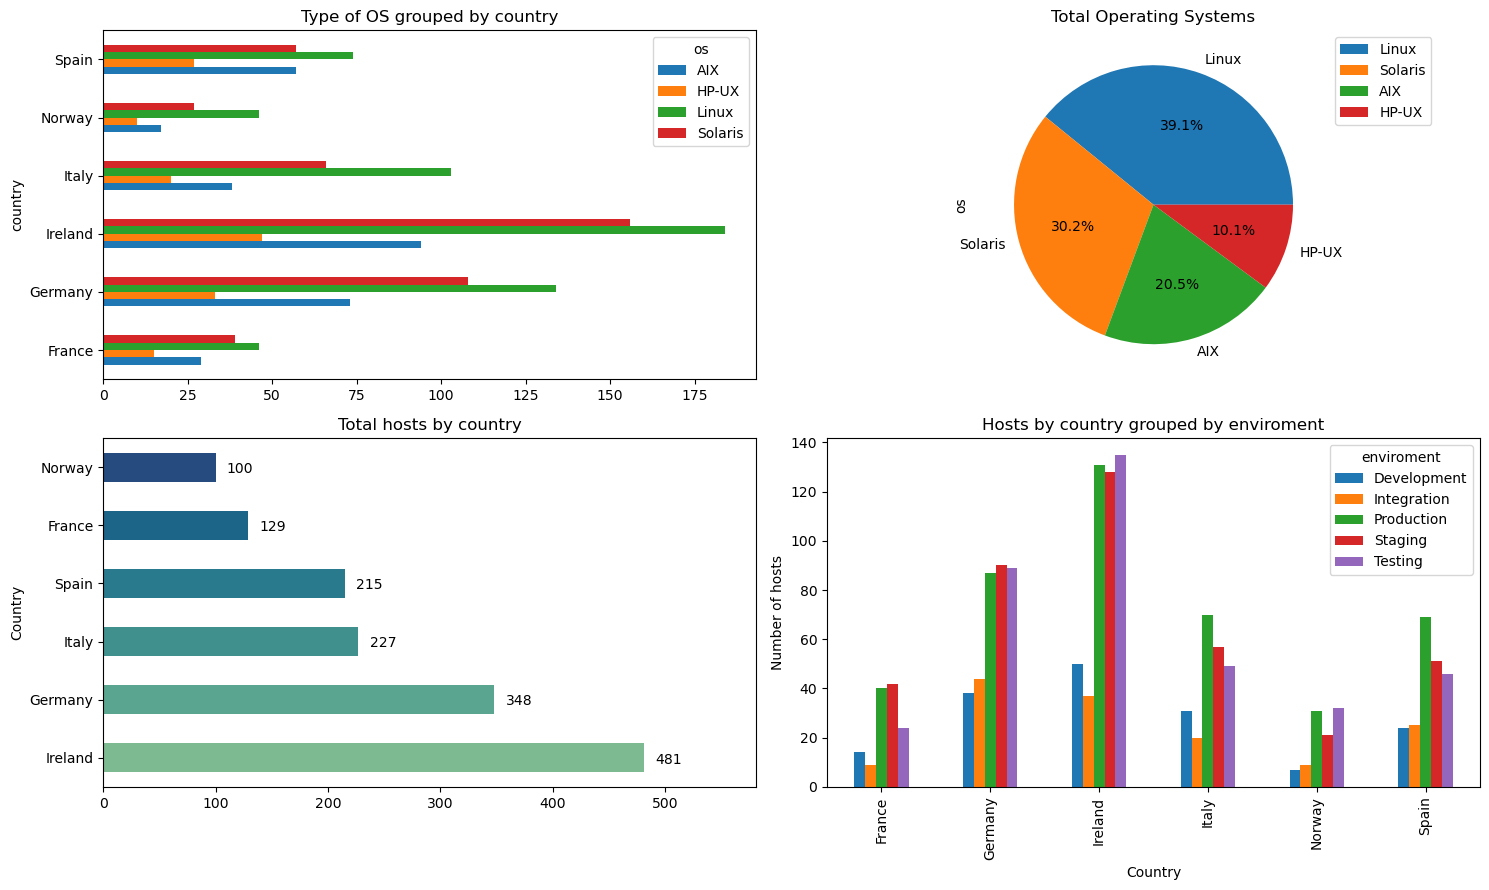

In [25]:
df = pd.DataFrame(dataset)

# Crear la figura
fig, axs = plt.subplots(2,2, figsize=(15, 9))


# gráfico 1
axs[0, 0].set_title('Type of OS grouped by country')
df.groupby(['country', 'os']).size().unstack().plot(kind='barh', ax=axs[0, 0], legend=True)


# gráfico 2
axs[0, 1].set_title('Total Operating Systems')
df['os'].value_counts().plot(kind='pie', ax=axs[0, 1], autopct='%1.1f%%')
axs[0, 1].legend(df['os'].value_counts().index, loc="best", bbox_to_anchor=(1.0, 1.0))


# gráfico 3
axs[1, 0].set_title('Total hosts by country')
df['country'].value_counts().plot(kind='barh', 
                                  ax=axs[1, 0], 
                                  xlabel='Country',
                                  ylabel='Number of hosts',                                  
                                  xlim=(0, df['country'].value_counts().max()+100),
                                  color = sns.color_palette('crest'))

for i, v in enumerate(df['country'].value_counts()):
    axs[1, 0].text(v + 10, i -0.1, str(v)) #posicion x, y, texto 



# gráfico 4
hosts_by_country_env = df.groupby(['country', 'enviroment'])['enviroment'].count().unstack()
hosts_by_country_env.plot(
      kind='bar', 
      ax=axs[1, 1], 
      title='Hosts by country grouped by enviroment',
      xlabel='Country', 
      ylabel='Number of hosts'
                        )


fig.tight_layout()

plt.show()
